In [59]:
import matplotlib. pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [44]:
df1 = pd.read_csv("diabetes.csv")
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df1.shape

### Data set Comparises of 769 observations and 9 Characteristics  (columns).


(768, 9)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
##### No variables column has null/missing values. 
#### Data has only integer and float values. 
#### Data has numerical (discrete and Continous )data and categorical data  (because pyhton can not read catergorical values , we have to assign the vaules like (0,1)so the outcome colum is categorical data )

In [50]:
df2 = df1.drop(df1.columns[[0,2,3,4,5,6,7]], axis=1)
df2.describe()

,Glucose,Outcome
count,768.000000,768.000000
mean,120.894531,0.348958
std,31.972618,0.476951
min,0.000000,0.000000
25%,99.000000,0.000000
50%,117.000000,0.000000
75%,140.250000,1.000000
max,199.000000,1.000000


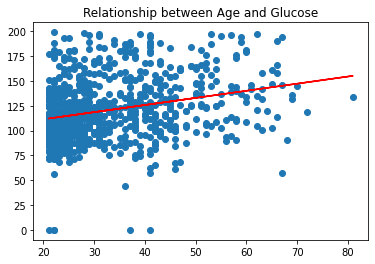

In [67]:

x = df1["Age"]
y = df1["Glucose"]

plt.title("Relationship between Age and Glucose")
plt.scatter(x,y)
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"r")
plt.show()
##### This graph illusrtates that as the age variable is increasing the Glucose also increasing.

In [96]:
# Assigning 1 as Diabetic and 0 as non-diabetic in new column OutcomeV1
conditions = [
    (df1['Outcome'] == 0),
    (df1['Outcome'] == 1)
    ]
values = ['Diabetic', 'Non-Diabetic']
df1['OutcomeV1'] = np.select(conditions, values)
print(df1['OutcomeV1'].value_counts())

Diabetic        500
Non-Diabetic    268
Name: OutcomeV1, dtype: int64


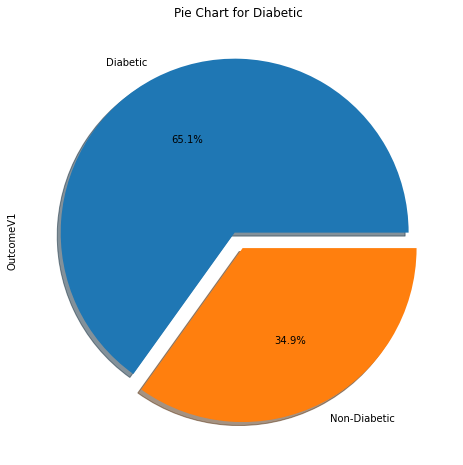

In [97]:
df1['OutcomeV1'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Pie Chart for Diabetic')
plt.show()

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

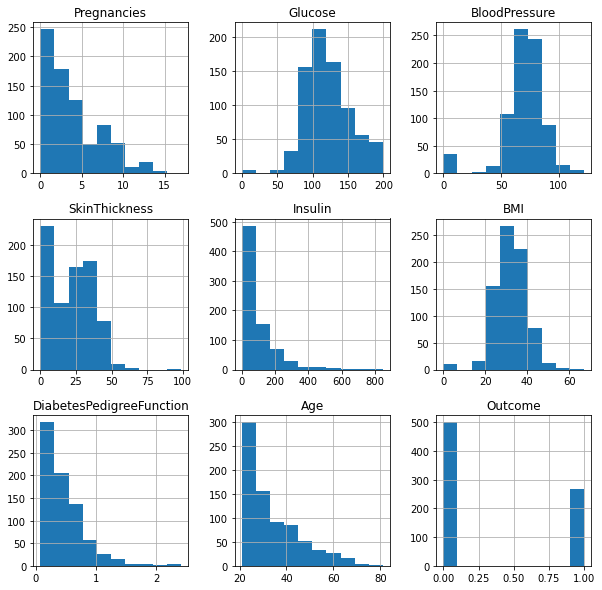

In [108]:
df1.hist(figsize=(10,10))

In [ ]:
####The graph illustres that variables name "Blood Pressure", "Glucose","BMI" are normally distributed , as we can see in graph there are bell shape curves.
####As the graph illustres that variables name "DiabetesPedigreeFunction","Age","Insulin","skinThickness","Pregnancies" are left skewed .

In [119]:
df1.skew(axis = 0, skipna = True)
#skewness = 0 : normally distributed.
#skewness > 0 : more weight in the left tail of the distribution.
#skewness < 0 : more weight in the right tail of the distribution. 

C:\Users\madhv\AppData\Local\Temp/ipykernel_11328/1229944174.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.skew(axis = 0, skipna = True)


Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

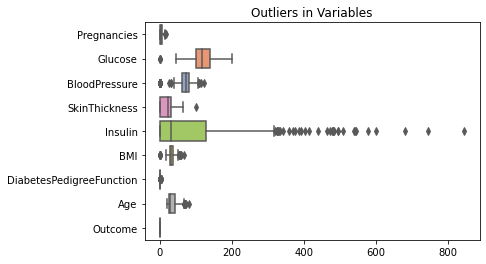

In [133]:
sns.boxplot(data=df1, orient="h", palette="Set2", width=0.8)
plt.title('Outliers in Variables')
plt.show()